# What sells a car?


Hundreds of free advertisements for vehicles are published on Crankshaft List site every day,
I'm going to study data collected over the last few years and determine which factors influence the price of a vehicle, by the foloowing steps:
Identify and study missing values,
Convert the data to the required type,
Calculate and add to the table,
Carry out exploratory data analysis, 
And write an overall conclusion


#### Table of contents: 

* [Initialization:](#Initialization)

* [Explore initial data:](#Explore-initial-data)

* [Treat missing values:](#Treat-missing-values-(if-any))

* [Fix data types, Enrich data:](#Fix-data-types)
   
* [Study core parameters](#Study-core-parameters)
   
* [Study and treat outliers](#Study-and-treat-outliers)
   
* [Study core parameters without outliers:](#Study-core-parameters-without-outliers)
   
   * a.[Ads-lifetime](#Ads-lifetime)
   * b.[Average price per each type of vehicle](#Average-price-per-each-type-of-vehicle)
   * c.[Price factors](#Price-factors)
* [General Conclusion](#General-conclusion)

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from pandas_profiling import ProfileReport
# Load the data
try:
    vehicles = pd.read_csv('vehicles_us.csv')
except:
    vehicles = pd.read_csv('/datasets/vehicles_us.csv')


### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal


In [2]:
# print the general/summary information about the DataFrame
print(vehicles.shape)
print('*********************************')
vehicles.info()
print('*********************************')
vehicles.describe(include='all').T

(51525, 13)
*********************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB
*********************************


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,51525.0,NaN,NaN,NaN,12132.46492,10040.803015,1.0,5000.0,9000.0,16839.0,375000.0
model_year,47906.0,NaN,NaN,NaN,2009.75047,6.282065,1908.0,2006.0,2011.0,2014.0,2019.0
model,51525,100,ford f-150,2796,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,51525,6,excellent,24773,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cylinders,46265.0,NaN,NaN,NaN,6.125235,1.66036,3.0,4.0,6.0,8.0,12.0
fuel,51525,5,gas,47288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
odometer,43633.0,NaN,NaN,NaN,115553.461738,65094.611341,0.0,70000.0,113000.0,155000.0,990000.0
transmission,51525,3,automatic,46902,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,51525,13,SUV,12405,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paint_color,42258,12,white,10029,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# print a sample of data
print(vehicles.head())


   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28  


Therse are missing values at 5/13 columns:

'model_year':    3,619/  51,525

'cylinders':     5,260/  51,525

'odometer':      7,892/  51,525

'paint_color':    9,267/  51,525

'is_4wd':         25,953/ 51,525


In [4]:
# change 'date_posted' column from object to datetime
pd.to_datetime(vehicles['date_posted'], format='%Y.%m.%d')

0       2018-06-23
1       2018-10-19
2       2019-02-07
3       2019-03-22
4       2019-04-02
           ...    
51520   2018-10-03
51521   2018-11-14
51522   2018-11-15
51523   2018-07-02
51524   2018-06-05
Name: date_posted, Length: 51525, dtype: datetime64[ns]

## Treat missing values (if any)

**'is_4wd' column is Boolian type, Im assuming that the empty cell should be '0' since all the other cells contain '1'**

In [5]:
# filling the 'is_4wd' columns, Its obvious that the Nan vulues suppose to be F- 0.
vehicles['is_4wd']= vehicles['is_4wd'].fillna(value='0')
print('is_4wd:', len(vehicles[vehicles['is_4wd'].isnull()]))

is_4wd: 0


Im going to fill 'model_year' empty cell with the median year for every car model: 
relevant year is >1990 by the Interactions in ProfileReport for model and model year, we can see they interct start from 1990

In [6]:
relevant_years = vehicles.query('model_year>1990')
group_years = relevant_years.groupby('model')['model_year'].median().round()

for i in group_years.index:
    vehicles.loc[(vehicles['model']== i)& vehicles['model_year'].isnull(), 'model_year']= group_years[i]

len(vehicles[vehicles['model_year'].isnull() == 1])

0

I'm going to fill the 'cylinders' missing valuse with the maximum number of cylinders in type, and model sub group:

In [7]:
vehicles['cylinders']=vehicles.groupby(['type','model'])['cylinders'].transform(
    lambda grp: grp.fillna(grp.mode().max()))

len(vehicles[vehicles['cylinders'].isnull()==1])

15

There is still 15 missing values, Im going to fill it with the maximum number of cylinders in type sub group:

In [8]:
vehicles['cylinders']=vehicles.groupby(['type'])['cylinders'].transform(
    lambda grp: grp.fillna(grp.mode().max()))
len(vehicles[vehicles['cylinders'].isnull()==1])

0

There is no way to guss the car paint, I'll set the mising values as unknown

In [9]:
vehicles['paint_color']=vehicles['paint_color'].fillna('unknown')

len(vehicles[vehicles['paint_color'].isnull()==1])

0

Im going to fill 'odometer' empty cell with the median odometer for every  model year: 
relevant odometer is >1990 by the Interactions in ProfileReport for odometer and model year, we can see they interct under 300K

In [10]:
relevant_years = vehicles.query('odometer < 300000')
group_years = relevant_years.groupby('model_year')['odometer'].median().round()

for i in group_years.index:
    vehicles.loc[(vehicles['model_year']== i)& vehicles['odometer'].isnull(), 'odometer']= group_years[i]

len(vehicles[vehicles['odometer'].isnull() == 1])


1

In [11]:
vehicles[vehicles['odometer'].isnull() == 1]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,0,2018-11-18,59


In [12]:
max_odometer= vehicles['odometer'].max()
vehicles.loc[vehicles['odometer'].isnull()==1, 'odometer'] =max_odometer
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  object 
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 5.1+ MB


## Fix data types

In [13]:
vehicles['model_year'] = vehicles['model_year'].astype(int)
vehicles['cylinders'] = vehicles['cylinders'].astype(int)
vehicles['odometer'] = vehicles['odometer'].astype(int)
vehicles['is_4wd'] = vehicles['is_4wd'].astype(bool)

## Enrich data

In [14]:
# Add datetime values for when the ad was placed
vehicles['day_posted'] = pd.DatetimeIndex(vehicles['date_posted']).day
vehicles['month_posted'] = pd.DatetimeIndex(vehicles['date_posted']).month
vehicles['year_posted'] = pd.DatetimeIndex(vehicles['date_posted']).year
print(vehicles.head())

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5       good          6  gas    145000   
1  25500        2011      ford f-150       good          6  gas     88705   
2   5500        2013  hyundai sonata   like new          4  gas    110000   
3   1500        2003      ford f-150       fair          8  gas    160000   
4  14900        2017    chrysler 200  excellent          4  gas     80903   

  transmission    type paint_color  is_4wd date_posted  days_listed  \
0    automatic     SUV     unknown    True  2018-06-23           19   
1    automatic  pickup       white    True  2018-10-19           50   
2    automatic   sedan         red    True  2019-02-07           79   
3    automatic  pickup     unknown    True  2019-03-22            9   
4    automatic   sedan       black    True  2019-04-02           28   

   day_posted  month_posted  year_posted  
0          23             6         2018  
1          19           

In [15]:
# Add the vehicle's age when the ad was placed

vehicles['age']= vehicles['year_posted']- vehicles['model_year']
print(vehicles.head())

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5       good          6  gas    145000   
1  25500        2011      ford f-150       good          6  gas     88705   
2   5500        2013  hyundai sonata   like new          4  gas    110000   
3   1500        2003      ford f-150       fair          8  gas    160000   
4  14900        2017    chrysler 200  excellent          4  gas     80903   

  transmission    type paint_color  is_4wd date_posted  days_listed  \
0    automatic     SUV     unknown    True  2018-06-23           19   
1    automatic  pickup       white    True  2018-10-19           50   
2    automatic   sedan         red    True  2019-02-07           79   
3    automatic  pickup     unknown    True  2019-03-22            9   
4    automatic   sedan       black    True  2019-04-02           28   

   day_posted  month_posted  year_posted  age  
0          23             6         2018    7  
1          19 

In [16]:
# for cells where age==0, we going to have inf for age, need to fix it:
print(vehicles.query('age==0'))

       price  model_year                        model  condition  cylinders  \
19     13990        2018              hyundai elantra  excellent          4   
71     23300        2018  nissan frontier crew cab sv       good          6   
78     23800        2019  nissan frontier crew cab sv       good          6   
99     39950        2018          chevrolet silverado  excellent          8   
106    21500        2019  nissan frontier crew cab sv       good          6   
...      ...         ...                          ...        ...        ...   
51376  27890        2018                     ram 1500  excellent          8   
51442  28990        2018                    ford f150  excellent          8   
51446  15999        2018             chevrolet malibu  excellent          4   
51447  33990        2019                     ram 1500  excellent          8   
51504  20481        2018                 toyota camry   like new          4   

      fuel  odometer transmission    type paint_col

In [17]:
# Add the vehicle's average mileage per year

vehicles['average_mileage']= vehicles['odometer']/ vehicles['age']

# set the odometer value for average_milaeage for age==0:
vehicles.loc[vehicles['age']==0, 'average_mileage']= vehicles['odometer']

print(vehicles.head())

   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5       good          6  gas    145000   
1  25500        2011      ford f-150       good          6  gas     88705   
2   5500        2013  hyundai sonata   like new          4  gas    110000   
3   1500        2003      ford f-150       fair          8  gas    160000   
4  14900        2017    chrysler 200  excellent          4  gas     80903   

  transmission    type paint_color  is_4wd date_posted  days_listed  \
0    automatic     SUV     unknown    True  2018-06-23           19   
1    automatic  pickup       white    True  2018-10-19           50   
2    automatic   sedan         red    True  2019-02-07           79   
3    automatic  pickup     unknown    True  2019-03-22            9   
4    automatic   sedan       black    True  2019-04-02           28   

   day_posted  month_posted  year_posted  age  average_mileage  
0          23             6         2018    7

In [18]:
#check if the correction works:
print(vehicles.query('average_mileage == inf'))

Empty DataFrame
Columns: [price, model_year, model, condition, cylinders, fuel, odometer, transmission, type, paint_color, is_4wd, date_posted, days_listed, day_posted, month_posted, year_posted, age, average_mileage]
Index: []


In [19]:
# turn average_mileage column to int

vehicles['average_mileage'] = vehicles['average_mileage'].astype(int)

In [20]:
# It might help to replace the condition values with something that can be manipulated more easily
vehicles['condition']=vehicles['condition'].replace({
     "new": 5,
     "like new": 4,
     "excellent": 3,
     "good": 2,
     "fair": 1,
     "salvage": 0
 })
 
print(vehicles['condition'].unique())

[2 4 1 3 0 5]


## Check clean data

In [21]:
# print the general/summary information about the DataFrame

vehicles.info()
vehicles.describe(include='all').T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   price            51525 non-null  int64 
 1   model_year       51525 non-null  int32 
 2   model            51525 non-null  object
 3   condition        51525 non-null  int64 
 4   cylinders        51525 non-null  int32 
 5   fuel             51525 non-null  object
 6   odometer         51525 non-null  int32 
 7   transmission     51525 non-null  object
 8   type             51525 non-null  object
 9   paint_color      51525 non-null  object
 10  is_4wd           51525 non-null  bool  
 11  date_posted      51525 non-null  object
 12  days_listed      51525 non-null  int64 
 13  day_posted       51525 non-null  int64 
 14  month_posted     51525 non-null  int64 
 15  year_posted      51525 non-null  int64 
 16  age              51525 non-null  int64 
 17  average_mileage  51525 non-null

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,51525.0,NaN,NaN,NaN,12132.46492,10040.803015,1.0,5000.0,9000.0,16839.0,375000.0
model_year,51525.0,NaN,NaN,NaN,2009.798409,6.094915,1908.0,2007.0,2011.0,2014.0,2019.0
model,51525,100,ford f-150,2796,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,51525.0,NaN,NaN,NaN,2.637535,0.712447,0.0,2.0,3.0,3.0,5.0
cylinders,51525.0,NaN,NaN,NaN,6.122271,1.657544,3.0,4.0,6.0,8.0,12.0
fuel,51525,5,gas,47288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
odometer,51525.0,NaN,NaN,NaN,115149.068588,62158.116602,0.0,73500.0,114076.0,152800.0,990000.0
transmission,51525,3,automatic,46902,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,51525,13,SUV,12405,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paint_color,51525,13,white,10029,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# print a sample of data

vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age,average_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,23,6,2018,7,20714
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,19,10,2018,7,12672
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,True,2019-02-07,79,7,2,2019,6,18333
3,1500,2003,ford f-150,1,8,gas,160000,automatic,pickup,unknown,True,2019-03-22,9,22,3,2019,16,10000
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,True,2019-04-02,28,2,4,2019,2,40451


## Study core parameters

The parameters to annelize the data by:
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

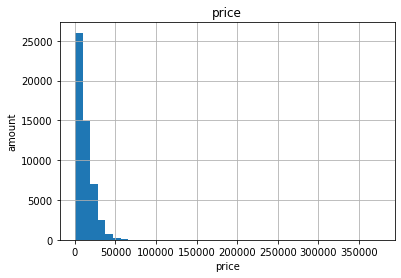

Positive skewed disribution
************** price  Box plot: **************


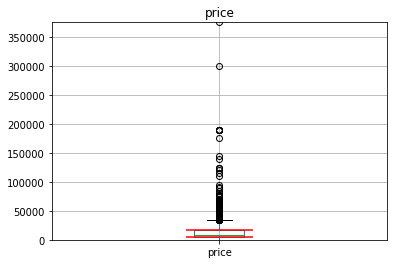

The minimal range: -12758.5
The maximal range: 34597.5

Precentage of clean data in condition column between boxplot extreme: 96.81%

The 5% range: 1950.0
The 95% range: 30300.0

Precentage of clean data in condition column between 5 and 95: 90.02%

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

*******************************************************************************************************
*******************************************************************************************************



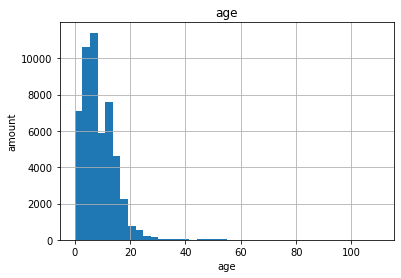

Positive skewed disribution
************** age  Box plot: **************


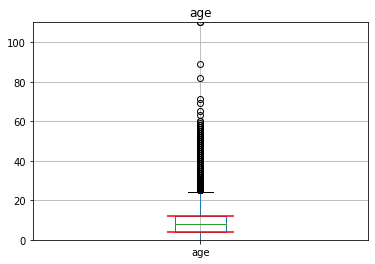

The minimal range: -8.0
The maximal range: 24.0

Precentage of clean data in condition column between boxplot extreme: 98.57%

The 5% range: 1.0
The 95% range: 19.0

Precentage of clean data in condition column between 5 and 95: 91.81%

count    51525.000000
mean         8.509054
std          6.108583
min          0.000000
25%          4.000000
50%          8.000000
75%         12.000000
max        110.000000
Name: age, dtype: float64

*******************************************************************************************************
*******************************************************************************************************



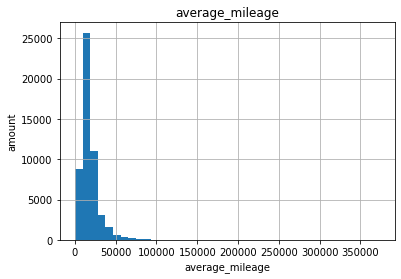

Positive skewed disribution
************** average_mileage  Box plot: **************


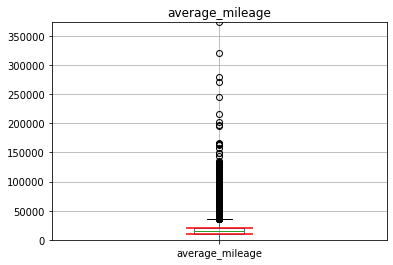

The minimal range: -4185.5
The maximal range: 36082.5

Precentage of clean data in condition column between boxplot extreme: 93.79%

The 5% range: 4705.0
The 95% range: 39834.59999999999

Precentage of clean data in condition column between 5 and 95: 90.00%

count     51525.000000
mean      17722.979214
std       12443.728883
min           0.000000
25%       10915.000000
50%       15235.000000
75%       20982.000000
max      373200.000000
Name: average_mileage, dtype: float64

*******************************************************************************************************
*******************************************************************************************************



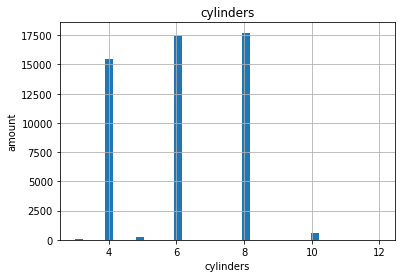

Positive skewed disribution
************** cylinders  Box plot: **************


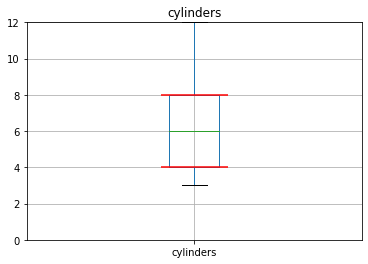

The minimal range: -2.0
The maximal range: 14.0

Precentage of clean data in condition column between boxplot extreme: 100.00%

The 5% range: 4.0
The 95% range: 8.0

Precentage of clean data in condition column between 5 and 95: 98.86%

count    51525.000000
mean         6.122271
std          1.657544
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

*******************************************************************************************************
*******************************************************************************************************



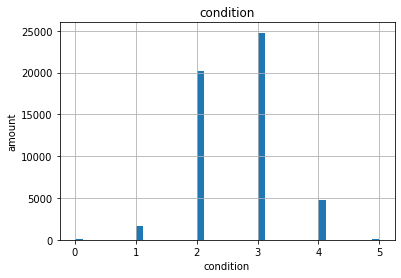

Negative skewed disribution
************** condition  Box plot: **************


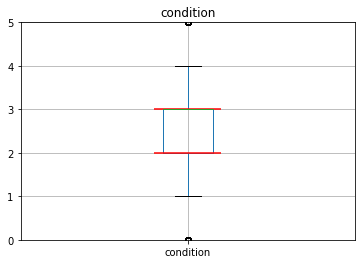

The minimal range: 0.5
The maximal range: 4.5

Precentage of clean data in condition column between boxplot extreme: 99.50%

The 5% range: 2.0
The 95% range: 4.0

Precentage of clean data in condition column between 5 and 95: 96.38%

count    51525.000000
mean         2.637535
std          0.712447
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

*******************************************************************************************************
*******************************************************************************************************

          prameter  mininal outlier by boxplot  maximal outlier by boxplot  \
0            price                    -12758.5                     34597.5   
1              age                        -8.0                        24.0   
2  average_mileage                     -4185.5                     36082.5   
3        cylinders                  

In [23]:
import matplotlib.pyplot as plt
column_to_plot=['price', 'age', 'average_mileage', 'cylinders', 'condition']
min_range=0
max_range=0
clean_data_presentage=0
border_list = []

for i in column_to_plot:
    %matplotlib inline
    hist= vehicles.hist(i, bins=40)
    plt.title(i)
    plt.ylabel('amount')
    plt.xlabel(i)
    plt.show()
    
    if vehicles[i].mean() < vehicles[i].median():
        print("Negative skewed disribution")
    else:
        print("Positive skewed disribution")
        
    Q1 = vehicles[i].quantile(0.25)
    Q3 = vehicles[i].quantile(0.75)
    IQR = Q3-Q1
    min_range = Q1-(1.5*IQR)
    max_range = Q3+(1.5*IQR)
    print("**************",i ," Box plot: **************")
    vehicles.boxplot(i)
    plt.ylim(0, vehicles[i].max())
    plt.hlines(y=[Q1, Q3], xmin = 0.9, xmax = 1.1, color='red')
    plt.title(i)
    plt.show()
    
    print("The minimal range:", min_range)
    print("The maximal range:", max_range)
    print()
    clean_data_presentage_byextreme = len(vehicles[(min_range <= vehicles[i]) & (vehicles[i]<= max_range)])/len(vehicles[i])
    print("Precentage of clean data in condition column between boxplot extreme: {:.2%}".format(clean_data_presentage_byextreme))
    print()
    
    ninety_five = np.percentile(vehicles[i], 95)
    five = np.percentile(vehicles[i], 5)
    border_list.append([i, min_range, max_range, five, ninety_five])
    clean_data_presentage = len(vehicles[(five <= vehicles[i]) & (vehicles[i]<= ninety_five)])/len(vehicles[i])
    print("The 5% range:", five)
    print("The 95% range:", ninety_five)
    print()
    print("Precentage of clean data in condition column between 5 and 95: {:.2%}".format(clean_data_presentage))
    print()
    print(vehicles[i].describe(include='all').T)
    print()
    print("*******************************************************************************************************")
    print("*******************************************************************************************************")
    print()
    
    
border_data = pd.DataFrame(border_list, columns= 
                           ['prameter','mininal outlier by boxplot','maximal outlier by boxplot'
                            , '5% are under this value','95% are above this value'])
print(border_data)


## Study and treat outliers

Given the results above, determine what columns may contain outliers, and create a DataFrame without those outliers. Hint: Outliers can be identified by defining the lower/upper limits for normal range of values:

***price column:***

by looking on the distribution I would like to set the outliers border between: 500 - 60,000 
by extreme point: 0 - 34,598
Precentage of clean data in condition column between boxplot extreme: 96.81%
by 5- 95 percentile: 1950 - 30,300
Precentage of clean data in condition column between 5 and 95: 90.02%

***age column:***

by looking on the distribution I would like to set the outliers border between: 0 - 30 
by extreme point:  0 - 24
Precentage of clean data in condition column between boxplot extreme: 98.57%
by 5- 95 percentile: 1 - 19
Precentage of clean data in condition column between 5 and 95: 91.81%

***average muleage:***

by looking on the distribution I would like to set the outliers border between: 0 - 90,000 
by extreme point: 0 - 36,082
Precentage of clean data in condition column between boxplot extreme: 93.79%
by 5- 95 percentile: 4705 - 39,843
Precentage of clean data in condition column between 5 and 95: 90.00%

***cylinder column:***

by looking on the distribution I would like to set the outliers border between: 4 - 8
by extreme point: 0 - 14
Precentage of clean data in condition column between boxplot extreme: 100.00%
by 5- 95 percentile: 4 - 8 
Precentage of clean data in condition column between 5 and 95: 98.86%

***condition column:***

by looking on the distribution I would like to set the outliers border between: 1 - 4
by extreme point: 0.5 - 4.5
Precentage of clean data in condition column between boxplot extreme: 99.50%
by 5- 95 percentile: 2 - 4 
Precentage of clean data in condition column between 5 and 95: 96.38%
Im going to set 5 ranges to set clean data by.

In [24]:
# set range based on the upper analysis for clean data:
filter_price = (vehicles['price'] >= 500 )&(vehicles['price'] <= 100000)
filter_age = vehicles['age'] <= 40
filter_average_mileage = vehicles['average_mileage'] <= 90000
filter_cylinders = (vehicles['cylinders'] >= 4 )&(vehicles['cylinders'] <= 8)
filter_condition = (vehicles['condition'] >= 1 )&(vehicles['condition'] <= 4)

In [25]:
# set clean data seperate data frame:
print('*************clean data: ***************')
clean_data =  vehicles[filter_price&filter_age&filter_average_mileage&filter_cylinders&filter_condition]
print(len(clean_data)/len(vehicles))
clean_data.head()

*************clean data: ***************
0.9623289665211062


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age,average_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,23,6,2018,7,20714
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,19,10,2018,7,12672
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,True,2019-02-07,79,7,2,2019,6,18333
3,1500,2003,ford f-150,1,8,gas,160000,automatic,pickup,unknown,True,2019-03-22,9,22,3,2019,16,10000
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,True,2019-04-02,28,2,4,2019,2,40451


In [26]:
good_index = clean_data.index
outliers = vehicles.query('index not in @ good_index')
print(len(outliers)/len(vehicles))
outliers.head()


0.037671033478893744


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,age,average_mileage
63,30000,1966,ford mustang,3,6,gas,51000,manual,convertible,red,True,2019-01-23,17,23,1,2019,53,962
95,9995,2017,hyundai sonata,3,4,gas,105985,automatic,sedan,white,True,2018-05-02,18,2,5,2018,1,105985
220,41800,2018,chevrolet silverado 3500hd,2,8,gas,148459,automatic,truck,unknown,True,2019-03-19,11,19,3,2019,1,148459
317,600,1999,toyota camry le,0,4,gas,216348,automatic,sedan,white,True,2019-03-04,23,4,3,2019,20,10817
357,16600,1975,chevrolet corvette,3,8,gas,75000,manual,coupe,unknown,True,2019-03-09,69,9,3,2019,44,1704


## Study core parameters without outliers

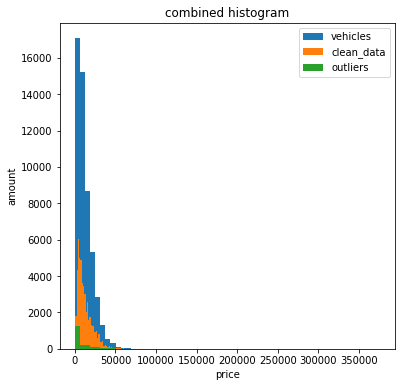

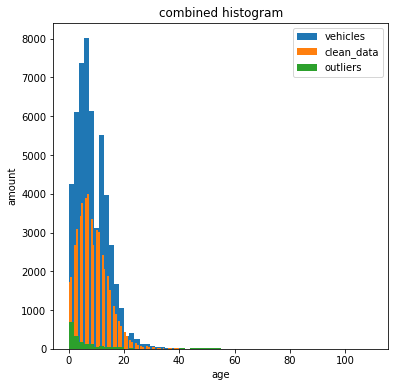

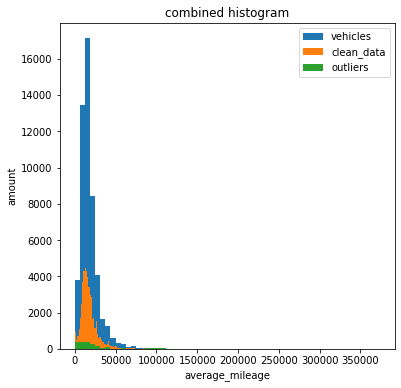

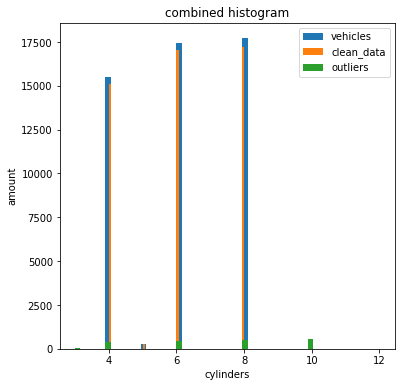

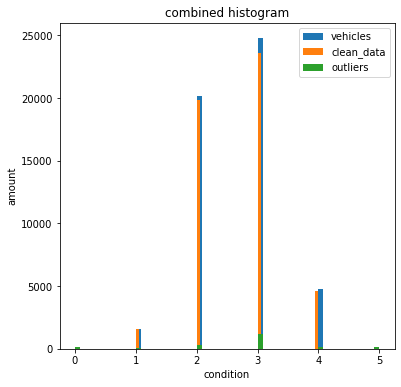

In [27]:
# plot price column from vehicles, clean data, and outliers together: 
column_to_plot=['price', 'age', 'average_mileage', 'cylinders', 'condition']
for i in column_to_plot:

    plt.figure(figsize=(6,6))
    vehicles[i].plot(kind = 'hist', bins=60) 
    clean_data[i].plot(kind = 'hist', bins=60) 
    outliers[i].plot(kind = 'hist', bins=60) 
    plt.title('combined histogram')
    plt.xlabel(i)
    plt.ylabel('amount')
    plt.legend(['vehicles', 'clean_data', 'outliers'])

### a. Ads lifetime:

In [28]:
print('days listed mean based on the clean data:',clean_data['days_listed'].mean())
print('days listed median based on the clean data:', clean_data['days_listed'].median())

days listed mean based on the clean data: 39.565424330429174
days listed median based on the clean data: 33.0


**************Days listed in clean data Box plot: **************


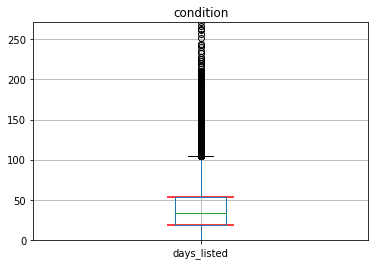

The minimal range: -32.0
The maximal range: 104.0
The mean : 39.565424330429174
The median: 33.0



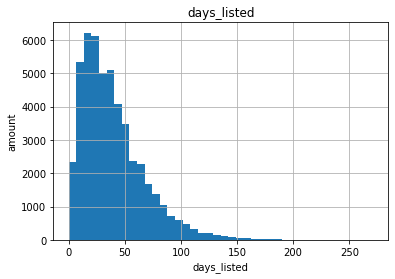

In [29]:
Q3 = clean_data['days_listed'].quantile(0.75)
Q1 = clean_data['days_listed'].quantile(0.25)
IQR = Q3-Q1
min_range = Q1-(1.5*IQR)
max_range = Q3+(1.5*IQR)
print("**************Days listed in clean data Box plot: **************")
clean_data.boxplot('days_listed')
plt.ylim(0, clean_data['days_listed'].max())
plt.hlines(y=[Q1, Q3], xmin = 0.9, xmax = 1.1, color='red')
plt.title(i)
plt.show()

print("The minimal range:", min_range)
print("The maximal range:", max_range)
print('The mean :',clean_data['days_listed'].mean())
print('The median:', clean_data['days_listed'].median())
print()
hist= clean_data.hist('days_listed', bins=40)
plt.title('days_listed')
plt.ylabel('amount')
plt.xlabel('days_listed')
plt.show()


most of the ads displayed between 10-70 days, 
some ads were diplayed for less then 5 days.
some ads were displayed for more then 100.

### b. Average price per each type of vehicle:

In [30]:
price_type = clean_data.groupby('type')['price'].agg(['count','mean']).sort_values(by= 'count', ascending= False).reset_index()
price_type

,type,count,mean
0,SUV,12017,11413.845219
1,sedan,11718,7096.734511
2,truck,11713,16898.638265
3,pickup,6866,16053.282406
4,coupe,2118,14509.151086
5,wagon,1516,9163.057388
6,mini-van,1149,8140.024369
7,hatchback,1013,6990.847976
8,van,603,10690.124378
9,convertible,402,13555.848259


In [31]:
top= price_type.head(2)['type']
print("the top 2 types with the max add numbers:")
top

the top 2 types with the max add numbers:


0      SUV
1    sedan
Name: type, dtype: object

Text(0.5, 0, 'number of adds for car type')

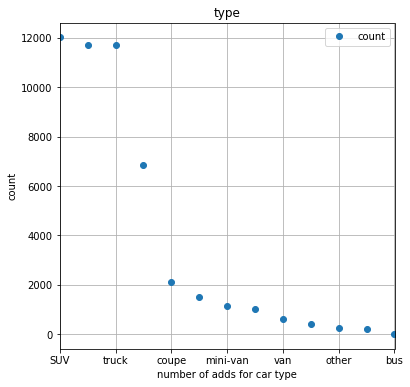

In [32]:
price_type.plot(x='type', y= 'count', style= 'o' ,grid = True, figsize = (6,6))
plt.title('type')
plt.ylabel('count')
plt.xlabel('number of adds for car type')


### c. Price factors:

In [33]:
new_data= clean_data[clean_data.type.isin(top)]
new_data['type'].unique()

array(['SUV', 'sedan'], dtype=object)

In [34]:
SUV= new_data[new_data['type']=='SUV']

sedan= new_data[new_data['type']=='sedan']
for_scatter_suv= SUV[['price', 'age', 'average_mileage', 'condition']]

for_boxplot_suv = SUV[['price','transmission','paint_color']]

for_scatter_sedan= sedan[['price', 'age', 'average_mileage', 'condition']]

for_boxplot_sedan = sedan[['price','transmission','paint_color']]


,price,age,average_mileage,condition
price,1.000000,-0.618017,0.274102,0.293633
age,-0.618017,1.000000,-0.574745,-0.317215
average_mileage,0.274102,-0.574745,1.000000,0.075201
condition,0.293633,-0.317215,0.075201,1.000000


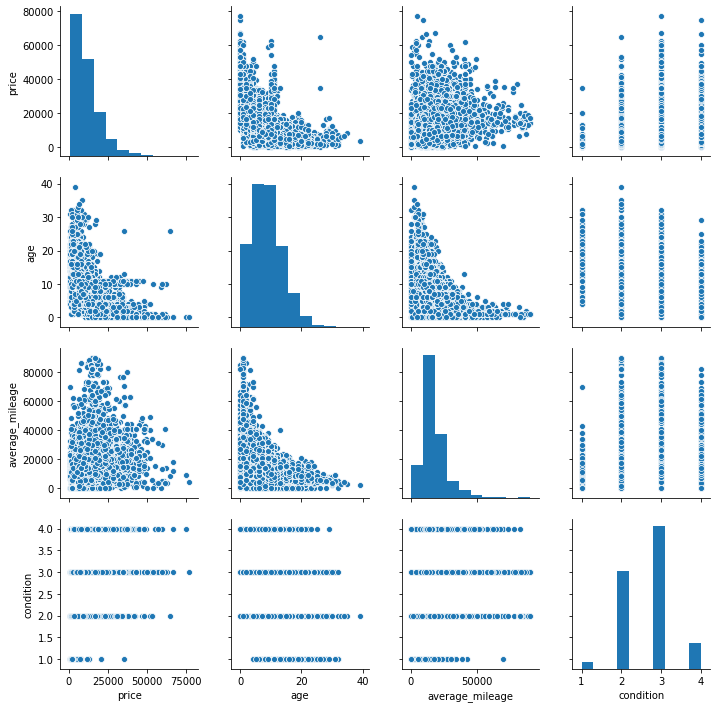

In [35]:
import seaborn as sns
sns.pairplot(for_scatter_suv)
for_scatter_suv.corr()

**the best corraltion is between price and age, wish make sesns, the older the car the cheaper its gett both for the sedan and the SUV**

,price,age,average_mileage,condition
price,1.000000,-0.665967,0.282789,0.322417
age,-0.665967,1.000000,-0.539594,-0.299222
average_mileage,0.282789,-0.539594,1.000000,0.072859
condition,0.322417,-0.299222,0.072859,1.000000


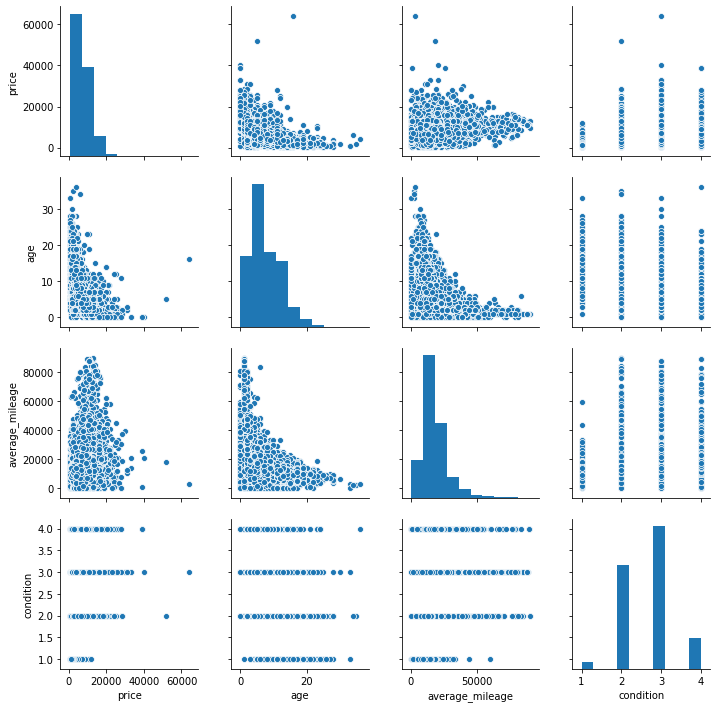

In [36]:
sns.pairplot(for_scatter_sedan)
for_scatter_sedan.corr()

**cheking for categorical values if >50:**

In [37]:
for_boxplot_suv.groupby('paint_color').count()

,price,transmission
paint_color,,
black,2132,2132
blue,1020,1020
brown,367,367
custom,278,278
green,425,425
grey,1161,1161
orange,82,82
purple,39,39
red,886,886


**for the SUV: the purple colore have lessn then 50, its not valid.**

In [38]:
for_boxplot_suv.groupby('transmission').count()

,price,paint_color
transmission,,
automatic,11421,11421
manual,506,506
other,90,90


In [39]:
for_boxplot_sedan.groupby('paint_color').count()

,price,transmission
paint_color,,
black,1706,1706
blue,1200,1200
brown,257,257
custom,266,266
green,206,206
grey,1591,1591
orange,9,9
purple,26,26
red,897,897


**for the sedan: the purple orenge and yellow colors have lessn then 50, its not valid.**

In [40]:
for_boxplot_sedan.groupby('transmission').count()

,price,paint_color
transmission,,
automatic,11065,11065
manual,582,582
other,71,71


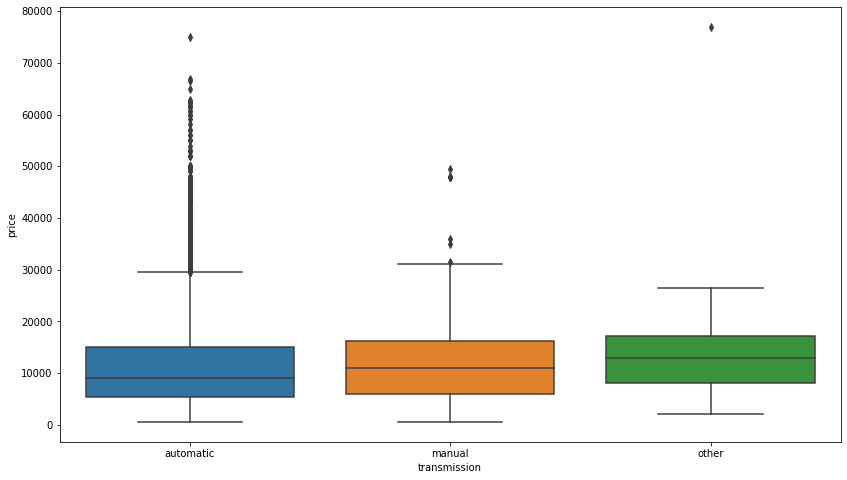

In [41]:
plt.figure(figsize=(14,8))
ax=sns.boxplot(x="transmission", y="price", data=for_boxplot_suv)

**The SUV manual cost mor then the automatic, its wired outcome, I would expect the automatic SUV to cost more, the automatic SUV has a long outlier tail.**

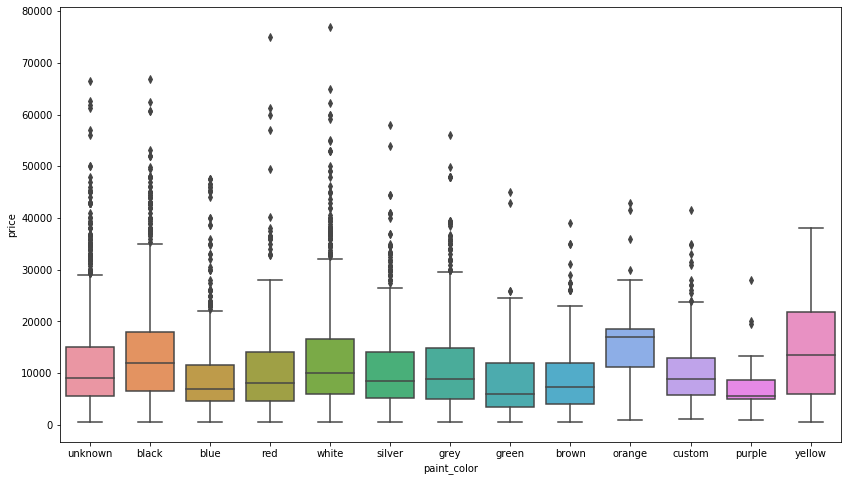

In [42]:
plt.figure(figsize=(14,8))
ax=sns.boxplot(x="paint_color", y="price", data=for_boxplot_suv)

**The orenge SUV is the most expensive car, the black, silver, blue, red, white, and grey have a long outlier tail, the purple SUV is not valid, it has less then 50 ads.**

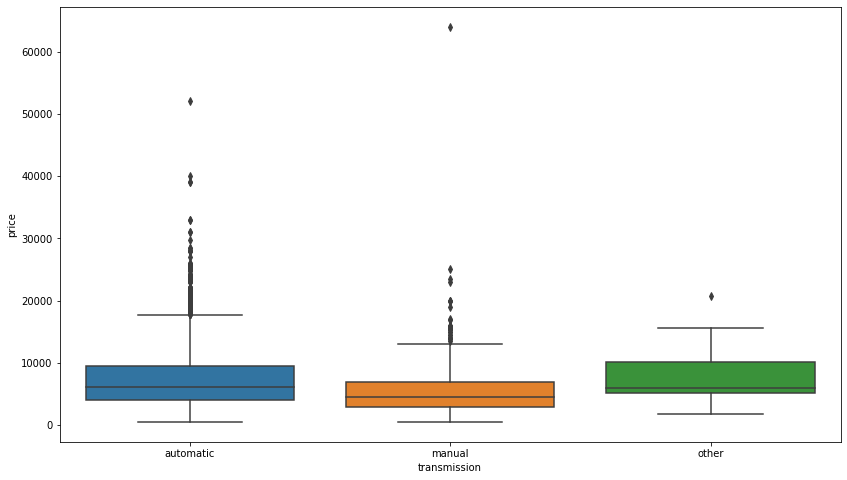

In [43]:
plt.figure(figsize=(14,8))
ax=sns.boxplot(x="transmission", y="price", data=for_boxplot_sedan)

**The manual sedan is cheaper as expected, the automatic SUV has a long outlier tail.**

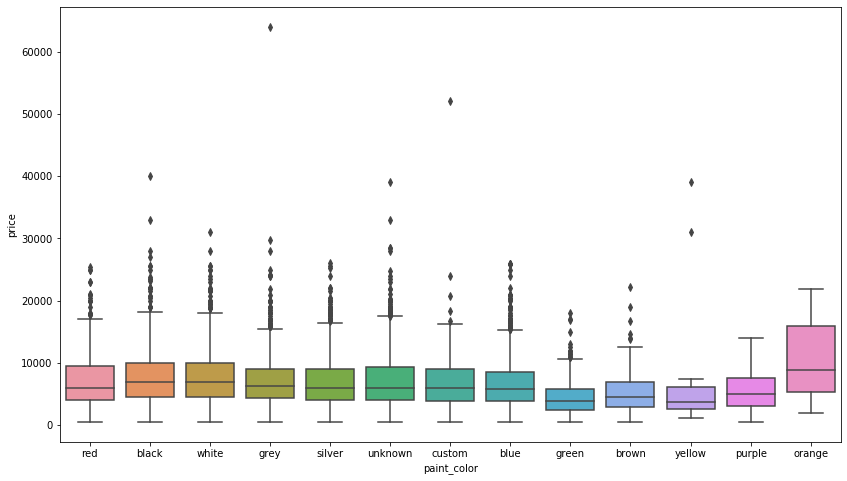

In [44]:
plt.figure(figsize=(14,8))
ax=sns.boxplot(x="paint_color", y="price", data=for_boxplot_sedan)

**All the colors have almost the same median cost, the black, silver, blue, red, white, and grey have a long outlier tail, the purple and the orenge have less then 50 ads, so its not valid.**

## General conclusion
I started with profile report to get a sense of the data, which columns gave connection,and where are the missing values.
I saw that in the is_4wd columns half of the value were missing, since all the other values been 1, and its boolian column, I change the empty cells into 0's.
**the model year column:**
by looking in the profile report, I saw that most of the values start at 1990, that the reason I'd set the earliest year for complition as 1991. then I found the median year for each model, and filled it to the missing values.
**the cylinders column:**
I filled the missing values maximal cylinder number for each type and model
and for the 15 remains just by type.
**the paint color column:**
I filled the missing values by the most common color for each model of each year, 
and for the remains just by most common color for every model.
**the odometer column:**
by the profile report, I'v notice that most values are under 300,000 so I set the initial filter as under 300,000.
Then Iv created a group for the median odometer of every model year.
I set the model year median odometer for every missing value. 
The remain missing value was a car for 1929, so I set its odometer to the maximum value.

After all the missing values have been completed, I changed the model_year, cylinder, odometer, and is_4wd columns to int64, in order to plot graphs.
I add new columns: day posted, month posted, year posted, car age, and average mileage.
I set odometer as average mileage for cars with the same year posted as model year, and change the condition column into numbers: "new": 5, "like new": 4, "excellent": 3, "good": 2, "fair": 1, "salvage": 0.

**Study core parameters:**
For - price,  age mileage, cylinders and condition I ploted an histogram and boxPlot in order to find the outliers.
After compering the outliers by 95,5 precenteg, extreme boxplot values and the outliers as its seem from the graph I set that outliers as the lowest and logical values for each core parameter:
500<= Price <= 100,000
Age <= 40
Average mileage <= 90,000
4<= Cylinder <= 8
1<= Condition <=4

I calculated the outliers (3.8%) and the clean data (96.2%) precentage as set them as new DataFrame, and plot each column for each df( original, clean and outliers) on the same graph to mke sue no mistake were made.

**stydy ads lifetime:**
I found the mean (39 days) and median 33(days) fore ad lifetime based on the clean data and ploted an histogram, most of the ads displayed between 10-70 days, some ads were diplayed for less then 5 days. some ads were displayed for more then 100 days, the outcome seem logical.

**Average price per each type of vehicle:**
Based on the clean data I summerized the mean price for each car type.

**Price factors:**
I locate the SUV and the sedan as the cars with the highst add share.
on those two cars types I tried to find what quantitive factor impact the price the most: age, average mileage, condition.
The age is has the highst corralation to price, negetive corralation (-0.67) that logical conclution.
For SUV and sedan the categorical factors: colors an transmission non showed conclusive impact on the price.